# Car Price prediction with Machine learning

In [1]:
import pandas as pd
car_data = pd.read_csv("car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [4]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
print(car_data.Year.value_counts().sort_index())

Year
2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: count, dtype: int64


In [6]:
car_data = car_data.drop('Car_Name', axis=1)


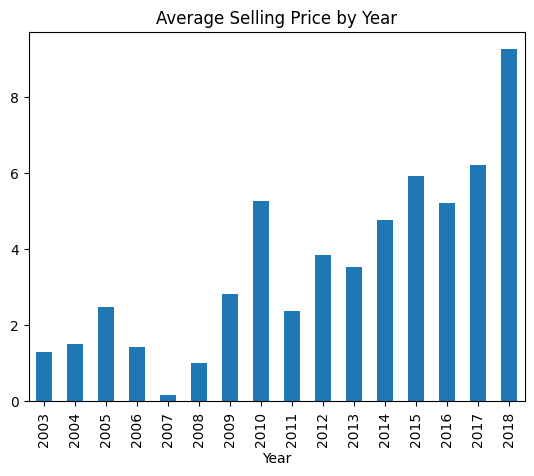

In [7]:
import matplotlib.pyplot as plt
average_price_by_year = car_data.groupby('Year')['Selling_Price'].mean()
average_price_by_year.plot(kind='bar')
plt.title('Average Selling Price by Year')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
car_data['Fuel_Type'] = label_encoder.fit_transform(car_data['Fuel_Type'])
car_data['Selling_type'] = label_encoder.fit_transform(car_data['Selling_type'])
car_data['Transmission'] = label_encoder.fit_transform(car_data['Transmission'])


X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']

# Spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train 
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
# test
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r_squared)

Mean Squared Error (MSE): 0.8512259872131138
R-squared (R2): 0.9630473458807466


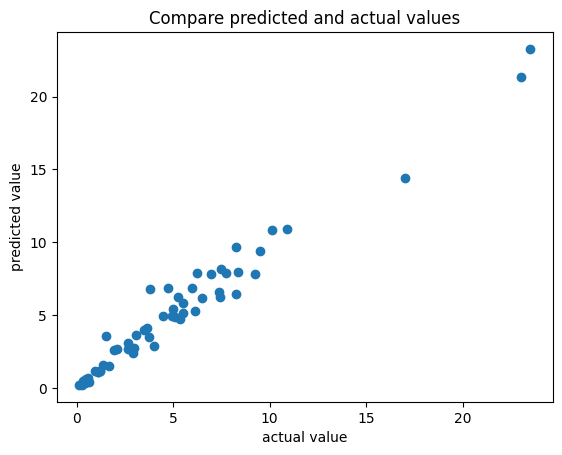

In [10]:
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=42,random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('Compare predicted and actual values')
plt.show()

In [11]:
model_filename = 'random_forest_car_price_model.joblib'
joblib.dump(rf_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as random_forest_car_price_model.joblib


In [12]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Loading the saved model
model_filename = 'random_forest_car_price_model.joblib'
loaded_model = joblib.load(model_filename)

# Input values 
new_input_values = {
    'Year': 2016,
    'Present_Price': 5.8,
    'Driven_kms': 65000,
    'Fuel_Type': 'Petrol',
    'Selling_type': 'Individual',
    'Transmission': 'Manual',
    'Owner': 0
}

new_input_data = pd.DataFrame([new_input_values])

#  categorical variables to numerical
label_encoder = LabelEncoder()
new_input_data['Fuel_Type'] = label_encoder.fit_transform(new_input_data['Fuel_Type'])
new_input_data['Selling_type'] = label_encoder.fit_transform(new_input_data['Selling_type'])
new_input_data['Transmission'] = label_encoder.fit_transform(new_input_data['Transmission'])

predicted_price = loaded_model.predict(new_input_data)

print("Predicted Selling Price:")
print(predicted_price[0])


Predicted Selling Price:
4.445238095238096
